### **Objective:** 

To classify MRI images used for Alzheimer detection as "Mild demented", "Very mild demented", "Moderate demented" and "Non demented" using Support Vector Machines.

### **Analysis:**

Data analysis involves following steps.
1. Understanding the data.
2. Exploratory data analysis.
3. Data preprocessing.
4. Model building

In [2]:
# Load the following libraries.

from sklearn.preprocessing import StandardScaler
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from skimage.transform import resize
import pandas as pd
from matplotlib.image import imread
from skimage.io import imread_collection
from PIL import Image
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import decomposition, preprocessing, svm
import sklearn.metrics as metrics 
from time import sleep
from tqdm.notebook import tqdm
import os
sns.set()

In [3]:
# Path to the dataset.

DATASET_PATH = '../input/alzheimer-mri-dataset/Dataset'

Diff_cls = ['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demanted']

In [4]:
# Storing different classes in different files.

mild = os.path.join(DATASET_PATH, Diff_cls[0], '*')
mild = glob(mild)

moderate = os.path.join(DATASET_PATH, Diff_cls[1], '*')
moderate = glob(moderate)

non = os.path.join(DATASET_PATH, Diff_cls[2], '*')
non = glob(non)

very_mild = os.path.join(DATASET_PATH, Diff_cls[3], '*')
very_mild = glob(very_mild)

### **Exploratory Data Analysis**

In [39]:
# Function to visualize images in the dataset.

def view_image(directory):
    img = mpimg.imread(directory)
    plt.imshow(img)
    plt.title(directory)
    plt.axis('off')
    print(f'Image shape:{img.shape}')
    return img

One of the image in Non Alzheimer Folder
Image shape:(128, 128)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

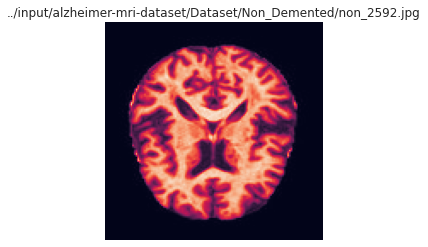

In [40]:
# MRI image of non Alzheimer patient.

print('One of the image in Non Alzheimer Folder')

view_image(non[1])

Alzheimer Patient's Brain
Image shape:(128, 128)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

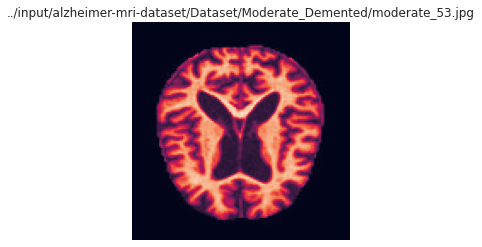

In [41]:
# MRI image of Alzheimer patient.

print('Alzheimer Patient\'s Brain')

view_image(moderate[1])

### **Data preprocessing**

In [7]:
# List to store the arrays.

resized_image_array = []

# List to store labels.

resized_image_array_label=[]

width = 256
height = 256
new_size = (width,height)

# Iterate over pictures and resize them to 256 by 256.

def resizer(image_directory):
    for file in image_directory: 
        img = Image.open(file)
        img = img.resize(new_size)
        array_temp = np.array(img)
        shape_new = width*height
        img_wide = array_temp.reshape(1, shape_new)
        resized_image_array.append(img_wide[0])
        if image_directory == non:
            resized_image_array_label.append(0)
        elif image_directory == very_mild:
            resized_image_array_label.append(1)
        elif image_directory == mild:
            resized_image_array_label.append(2)
        else:
            resized_image_array_label.append(3)

In [8]:
# Applying the resize function.

resizer(non)

resizer(very_mild)

resizer(mild)

resizer(moderate)

### **Model building**

### **Support Vector Machines**

In [ ]:
# Splitting the data to train and test data.

X_train, X_test, y_train, y_test = train_test_split(resized_image_array, resized_image_array_label, train_size = 0.7, random_state = 100)

In [33]:
# Builing a linear SVM model.

clf = svm.SVC(kernel = 'linear')

clf.fit(X_train, y_train)

SVC(kernel='linear')

In [34]:
# Predicting the test data.

y_pred = clf.predict(X_test)

# Determing the accuracy of the model.

print('Accuracy : ', metrics.accuracy_score(y_test, y_pred))

# Accuracy of the model is 99.83%.

Accuracy :  0.9983974358974359


In [35]:
# Building a SVM model with polynomial kernel.

clf = svm.SVC(kernel = 'poly')

clf.fit(X_train, y_train)

SVC(kernel='poly')

In [36]:
# Predicting the test data.

y_pred = clf.predict(X_test)

# Determining the accuracy of the model.

print('Accuracy : ', metrics.accuracy_score(y_test, y_pred))

# Accuracy of the model is 97.99%.

Accuracy :  0.9799679487179487


In [37]:
# Building a SVM model with Radial basis function (RBF) kernel.

clf = svm.SVC(kernel = 'rbf')

clf.fit(X_train, y_train)

SVC()

In [38]:
# Predicting the test data.

y_pred = clf.predict(X_test)

# Determing the accuracy of the model.

print('Accuracy : ', metrics.accuracy_score(y_test, y_pred))

# Accuracy of the model is 89.02%.

Accuracy :  0.8902243589743589


### **Conclusions:**

1. SVM with linear kernel resulted in an accuracy of 99.83%.
2. SVM with polynomial kernel resulted in an accuracy of 97.99% on the test data.
3. SVM with RBF kernel resulted in an accuracy of 89.02%
4. Hence SVM with linear kernel seems to separate classes better than SVM with polynomial and RBF kernel.

The complex kernels in this case do not enhance the performance of the model. This may be because having Alzheimer or not is very easy to distinguish by looking at the thickness of the grey mater and the size of the ventricles which does not require complex kernel functions.